Cleaning time: 
5.71365250000008
Training the MLP: 
MLP Time: 
0.6242506999999478
MLP Time: 
1.346840899999961
MLP Time: 
1.1870966999999837
MLP Time: 
0.6955944999999701
MLP Time: 
1.7260963999999603
Training the MLP Hyperparameters: 
OrderedDict([('activation', 'tanh'), ('alpha', 0.04259951672395633), ('learning_rate', 'constant')])
0.6535087719298246
0.34649122807017546
0.34649122807017546
0.6535087719298246
0.34649122807017546
0.34649122807017546
0.6535087719298246
0.34649122807017546
0.6535087719298246
0.6535087719298246
0.6535087719298246
0.3508771929824561
0.34649122807017546
0.6535087719298246
0.6535087719298246
0.34649122807017546
0.6535087719298246
0.34649122807017546
0.6535087719298246
0.34649122807017546
0.7785087719298246


c:\users\sam\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6535087719298246
0.34649122807017546
0.7872807017543859
Best weights: 
11
11
11


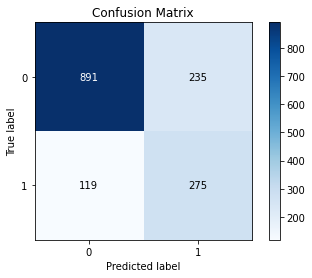

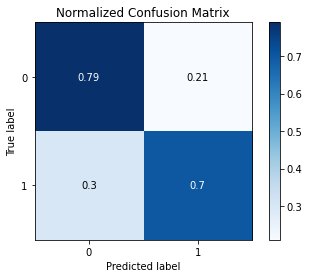

In [2]:
#Imports
import pandas as pd
import time as time
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

#Global lists
alredythere = []
listofwrongs = []
listofcolumns = []
listfixed = []

#Searching for any incorect records
def Creatingthelist(srs_a):
    lenth = srs_a.size
    for x in range(lenth):
        if pd.isna(srs_a[x]) == True or srs_a[x] == "Unknown" or srs_a[x] == ' ':
            if x in alredythere:
                x
            else:
                alredythere.append(x)
                listofwrongs.append(Data.loc[x])

#Cleaning Indication so everything is capitalised 
def CleaningIndication(srs_a):
    lenth = srs_a.size
    for x in range(lenth):
        if(srs_a[x] == 'CVA' or srs_a[x] == 'A-F' or srs_a[x] == 'ASX' or srs_a[x] == 'TIA'):
            x
        else:
            FreshData.at[x, 'Indication'] = str(srs_a[x]).upper()
            
def MLP(x_train,y_train,x_test):
    ST = time.perf_counter()
    model = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(70,70,70), activation = 'tanh', learning_rate = 'invscaling')
    trained_model = model.fit(x_train, y_train)
    predict = trained_model.predict(x_test)
    ET = time.perf_counter()    
    Timetaken = ET - ST
    print("MLP Time: ")
    print(Timetaken)
    return predict

def K_mean (model):
    X_T = [X_1,X_2,X_3,X_4,X_5]
    Y_T= [Y_1,Y_2,Y_3,Y_4,Y_5]
    P_Y = []
    Predict = []
    for i in range(5):
        #creating the training and test data sets
        temp_X = X_T
        temp_Y = Y_T
        temp_X.pop(i)
        temp_Y.pop(i)
        train_x = pd.concat(temp_X[j] for j in range(len(temp_X)))                 
        train_y = pd.concat(temp_Y[j] for j in range(len(temp_Y)))
        X_T = [X_1,X_2,X_3,X_4,X_5]
        Y_T= [Y_1,Y_2,Y_3,Y_4,Y_5]
        #traing the model
        temp = model(train_x,train_y,X_T[i])
        P_Y.append(temp)
    for i in range(len(P_Y)):
        for j in range(len(P_Y[i])):
            Predict.append(P_Y[i][j])
    real_Y = pd.concat(Y_T[j] for j in range(len(Y_T)))
    #confusion matrix
    skplt.metrics.confusion_matrix(Predict, real_Y)
    skplt.metrics.plot_confusion_matrix(
        Predict,
        real_Y,
        normalize = False
    )
    skplt.metrics.plot_confusion_matrix(
        Predict,
        real_Y,
        normalize = True
    )

def modeltrain(ly1,ly2,ly3):
    model1 = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(ly1,ly2,ly3), activation = 'tanh', learning_rate = 'invscaling')
    model2 = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(ly1,ly2,ly3), activation = 'tanh', learning_rate = 'invscaling')
    model3 = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(ly1,ly2,ly3), activation = 'tanh', learning_rate = 'invscaling')
    model1.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    model3.fit(x_train,y_train)
    print(model1.score(x_test,y_test))
    print(model2.score(x_test,y_test))
    print(model3.score(x_test,y_test))
    score = (model1.score(x_test,y_test) + model2.score(x_test,y_test) + model3.score(x_test,y_test))/3
    return score

#loading in the data
Data = pd.read_csv("Data.csv")
FreshData = Data
listofcolumns = FreshData.columns

#cycling through every column

for x in range(len(listofcolumns)):
    srs_a = FreshData[listofcolumns[x]]
    Creatingthelist(srs_a)
CleaningIndication(FreshData['Indication'])
ST = time.perf_counter()
CleanData = FreshData
for x in range(len(listofwrongs)):
    temp = listofwrongs[x]
    NAvalue = ''
    for j in range(len(listofcolumns)):
        if pd.isna(temp.loc[listofcolumns[j]]) == True or temp.loc[listofcolumns[j]] == "Unknown" or temp.loc[listofcolumns[j]] == ' ':
            NAvalue = listofcolumns[j]
    largestclosest = 0
    closestdata = CleanData.loc[0]
    for j in range(len(CleanData)):
        closest = 0
        testing = CleanData.loc[j]
        if(testing['Id'] == temp['Id']):
            continue
        if(testing['Indication'] == temp['Indication']):
            closest = closest + 1
        if(testing['Diabetes'] == temp['Diabetes']):
            closest = closest + 1
        if(testing['IHD'] == temp['IHD']):
            closest = closest + 1
        if(testing['Hypertension'] == temp['Hypertension']):
            closest = closest + 1
        if(testing['Arrhythmia'] == temp['Arrhythmia']):
            closest = closest + 1
        if(testing['History'] == temp['History']):
            closest = closest + 1
        try:
            if((testing['IPSI'] > (temp['IPSI'] - 10)) & (testing['IPSI'] < (temp['IPSI'] + 10))):
                closest = closest + 1
        except:
            closest
        try:
            if((int(testing['Contra']) > (int(temp['Contra']) - 10)) & (int(testing['Contra'])  < (int(temp['Contra']) + 10))):
                closest = closest + 1
        except:
            closest
        if(testing['label'] == temp['label']):
            closest = closest + 1
        if(closest > largestclosest):
            largestclosest = closest
            closestdata = testing
    CleanData.at[alredythere[x], NAvalue] = closestdata[NAvalue]
Data = CleanData
#creating a dataset that the models will accept 
Indication = pd.get_dummies(Data['Indication'],prefix='Indication')
Diabetes = pd.get_dummies(Data['Diabetes'],prefix='Diabetes')
IHD = pd.get_dummies(Data['IHD'],prefix='IHD')
Hypertension = pd.get_dummies(Data['Hypertension'],prefix='Hypertension')
History = pd.get_dummies(Data['History'],prefix='History')
label = pd.get_dummies(Data['label'],prefix='label')
label = label.drop(['label_NoRisk'], axis=1)
for x in range(len(Data['Contra'])):
    temp = int(Data['Contra'].loc[x])
    Data.at[x,'Contra'] = temp
New_data = pd.concat([Indication, Diabetes, IHD, Hypertension, History, Data['IPSI'], Data['Contra'] ,label], axis=1)

ET = time.perf_counter()    
Timetaken = ET - ST
print("Cleaning time: ")
print(Timetaken)
#Spliting the data 5 ways
X = New_data.loc[:, New_data.columns != 'label_Risk']
Y = New_data['label_Risk']
X_1 = X 
X_2 = X
X_3 = X
X_4 = X
X_5 = X
Y_1 = Y
Y_2 = Y
Y_3 = Y
Y_4 = Y
Y_5 = Y
for i in range(len(X)):
    if i < 304:
        X_2 = X_2.drop([i])
        Y_2 = Y_2.drop([i])
        X_3 = X_3.drop([i])
        Y_3 = Y_3.drop([i])
        X_4 = X_4.drop([i])
        Y_4 = Y_4.drop([i])
        X_5 = X_5.drop([i])
        Y_5 = Y_5.drop([i])
    elif i < 608:
        X_1 = X_1.drop([i])
        Y_1 = Y_1.drop([i])
        X_3 = X_3.drop([i])
        Y_3 = Y_3.drop([i])
        X_4 = X_4.drop([i])
        Y_4 = Y_4.drop([i])
        X_5 = X_5.drop([i])
        Y_5 = Y_5.drop([i])
    elif i < 911:
        X_1 = X_1.drop([i])
        Y_1 = Y_1.drop([i])
        X_2 = X_2.drop([i])
        Y_2 = Y_2.drop([i])
        X_4 = X_4.drop([i])
        Y_4 = Y_4.drop([i])
        X_5 = X_5.drop([i])
        Y_5 = Y_5.drop([i])
    elif i < 1215:
        X_1 = X_1.drop([i])
        Y_1 = Y_1.drop([i])
        X_2 = X_2.drop([i])
        Y_2 = Y_2.drop([i])
        X_3 = X_3.drop([i])
        Y_3 = Y_3.drop([i])
        X_5 = X_5.drop([i])
        Y_5 = Y_5.drop([i])
    else:
        X_1 = X_1.drop([i])
        Y_1 = Y_1.drop([i])
        X_2 = X_2.drop([i])
        Y_2 = Y_2.drop([i])
        X_3 = X_3.drop([i])
        Y_3 = Y_3.drop([i])
        X_4 = X_4.drop([i])
        Y_4 = Y_4.drop([i])
print("Training the MLP: ")
K_mean(MLP)

print("Training the MLP Hyperparameters: ")
x_train,x_test,y_train,y_test  = train_test_split(New_data.loc[:, New_data.columns != 'label_Risk'], New_data['label_Risk'], test_size=0.3, shuffle=True)
#MLP Hyperparameters
model = MLPClassifier(hidden_layer_sizes=(70,70,70))
search_space = {
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
    }
    
MLPmodel = BayesSearchCV(model, search_space, n_iter=32, scoring="accuracy", n_jobs=-1, cv=5)
MLPmodel.fit(x_train, y_train) 
print(MLPmodel.best_params_)

target = False

bestscore = 0
bestweights = [0,0,0]
for x in range(1,20,10):
    for j in range(1,20,10):
        for k in range(1,20,10):
            if(target == False):
                score = modeltrain(x,j,k)
                if(score > bestscore):
                    bestscore = score
                    bestweights[0]=x
                    bestweights[1]=j
                    bestweights[2]=k

                    
print("Best weights: ")
for i in range(3):
    print(bestweights[i])
    